In [2]:
# Importing essential libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the training and test datasets
train_data = pd.read_csv('housing_train.csv')
test_data = pd.read_csv('housing_test.csv')

# Display the first few rows of the training data
train_data.head()

# Check for data types and missing values
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Identifying numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Filling missing values for numerical columns with the median
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].median())

# Filling missing values for categorical columns with the mode
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])

# Confirming no missing values remain
print(train_data.isnull().sum())


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [5]:
# Apply one-hot encoding to categorical columns
train_data_encoded = pd.get_dummies(train_data, drop_first=True)

# Display the transformed data
train_data_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [6]:
# Separate features (X) and target (y)
X = train_data_encoded.drop('SalePrice', axis=1)
y = train_data_encoded['SalePrice']

In [7]:
# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print(X_train.shape, X_val.shape)

(1168, 245) (292, 245)


In [8]:
# Standardizing the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [9]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# Make predictions on the validation set
y_pred = model.predict(X_val_scaled)

# Evaluate the model using RMSE and R²
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Root Mean Squared Error (RMSE): 28357.624218846646
R-squared (R²): 0.895160280069468


In [11]:
# Handling missing values in the test data
numerical_cols_test = test_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_test = test_data.select_dtypes(include=['object']).columns

test_data[numerical_cols_test] = test_data[numerical_cols_test].fillna(test_data[numerical_cols_test].median())
test_data[categorical_cols_test] = test_data[categorical_cols_test].fillna(test_data[categorical_cols_test].mode().iloc[0])

# One-hot encoding the test data
test_data_encoded = pd.get_dummies(test_data, drop_first=True)

# Ensure the test data has the same features as the training data
test_data_encoded = test_data_encoded.reindex(columns=X.columns, fill_value=0)

# Scale the test features
X_test_scaled = scaler.transform(test_data_encoded)

In [12]:
# Make predictions on the test dataset
test_predictions = model.predict(X_test_scaled)

# Save predictions to a CSV file
predictions_df = pd.DataFrame({'Id': test_data.index, 'SalePrice': test_predictions})
predictions_df.to_csv('house_price_predictions.csv', index=False)

print("Predictions have been saved to 'house_price_predictions.csv'.")


Predictions have been saved to 'house_price_predictions.csv'.


Hyper parameter

In [15]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}


In [16]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid, 
    n_iter=10,  # Number of different combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,  # Show progress of the search
    random_state=42, 
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Display the best parameters found by RandomizedSearchCV
print(f"Best hyperparameters found: {random_search.best_params_}")

# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred_best = best_rf_model.predict(X_val_scaled)

# Evaluate the model using RMSE and R²
rmse_best = np.sqrt(mean_squared_error(y_val, y_pred_best))
r2_best = r2_score(y_val, y_pred_best)

print(f'Best Model RMSE: {rmse_best}')
print(f'Best Model R²: {r2_best}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters found: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 40}
Best Model RMSE: 29405.969237126195
Best Model R²: 0.8872654169565077


In [17]:
# Save the best model to a file (for future use)
import joblib
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Make predictions on the test dataset using the best model
test_predictions_best = best_rf_model.predict(X_test_scaled)

# Save predictions to a CSV file
predictions_df_best = pd.DataFrame({'Id': test_data.index, 'SalePrice': test_predictions_best})
predictions_df_best.to_csv('house_price_predictions_best.csv', index=False)

print("Predictions with the best model have been saved to 'house_price_predictions_best.csv'.")

Predictions with the best model have been saved to 'house_price_predictions_best.csv'.


Feature Engineering

In [18]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(X_train_scaled)

Feature Selection

In [22]:
data_encoded = pd.get_dummies(train_data, drop_first=True)

In [23]:
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(train_data, drop_first=True)

# Calculate the correlation matrix with the target variable (e.g., 'SalePrice')
correlation_matrix = data_encoded.corr()

# Extract features highly correlated with 'SalePrice'
target_corr = correlation_matrix['SalePrice']
high_corr_features = target_corr[target_corr.abs() > 0.5].index

# Display features with high correlation
print("Highly correlated features with 'SalePrice':")
print(high_corr_features)

# Filter dataset to include only these highly correlated features
filtered_data = data_encoded[high_corr_features]


Highly correlated features with 'SalePrice':
Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc',
       'BsmtQual_TA', 'KitchenQual_TA', 'GarageFinish_Unf'],
      dtype='object')


In [25]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
selector = RFE(RandomForestRegressor(), n_features_to_select=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

In [26]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Mean RMSE: {-scores.mean()}")

Mean RMSE: 30574.772522481508


In [32]:
import optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 40),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
    }
    model = RandomForestRegressor(**params)
    score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='neg_root_mean_squared_error')
    return -score.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print(study.best_params)


c:\Users\srava\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-11-25 19:13:37,414] A new study created in memory with name: no-name-491424f2-3ac3-468d-91eb-c8d1b5cc41cd
[I 2024-11-25 19:13:44,932] Trial 0 finished with value: 30463.951075386514 and parameters: {'n_estimators': 330, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 30463.951075386514.
[I 2024-11-25 19:13:53,218] Trial 1 finished with value: 30332.411062429193 and parameters: {'n_estimators': 391, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 1 with value: 30332.411062429193.
[I 2024-11-25 19:14:01,001] Trial 2 finished with value: 29832.97032125633 and parameters: {'n_estimators': 367, 'max_depth': 31, 'min_samples_split': 10,

{'n_estimators': 384, 'max_depth': 33, 'min_samples_split': 6, 'min_samples_leaf': 2}


Analysis of the data

In [1]:
# Data Overview
import pandas as pd

# Load training dataset
train_data = pd.read_csv('housing_train.csv')

# Basic Information
print("Training Dataset Shape:", train_data.shape)
print("\nTraining Dataset Info:")
print(train_data.info())

# Display first few rows
print("\nFirst 5 Rows of Training Data:")
print(train_data.head())

# Check for missing values
missing_values = train_data.isnull().sum()
print("\nMissing Values in Training Data:")
print(missing_values)


Training Dataset Shape: (1460, 81)

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object

Descriptive Statistics

In [ ]:
print("\nDescriptive Statistics of Training Data:")
print(train_data.describe())


Descriptive Statistics of Training Data:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904  

Histograms and Boxplots

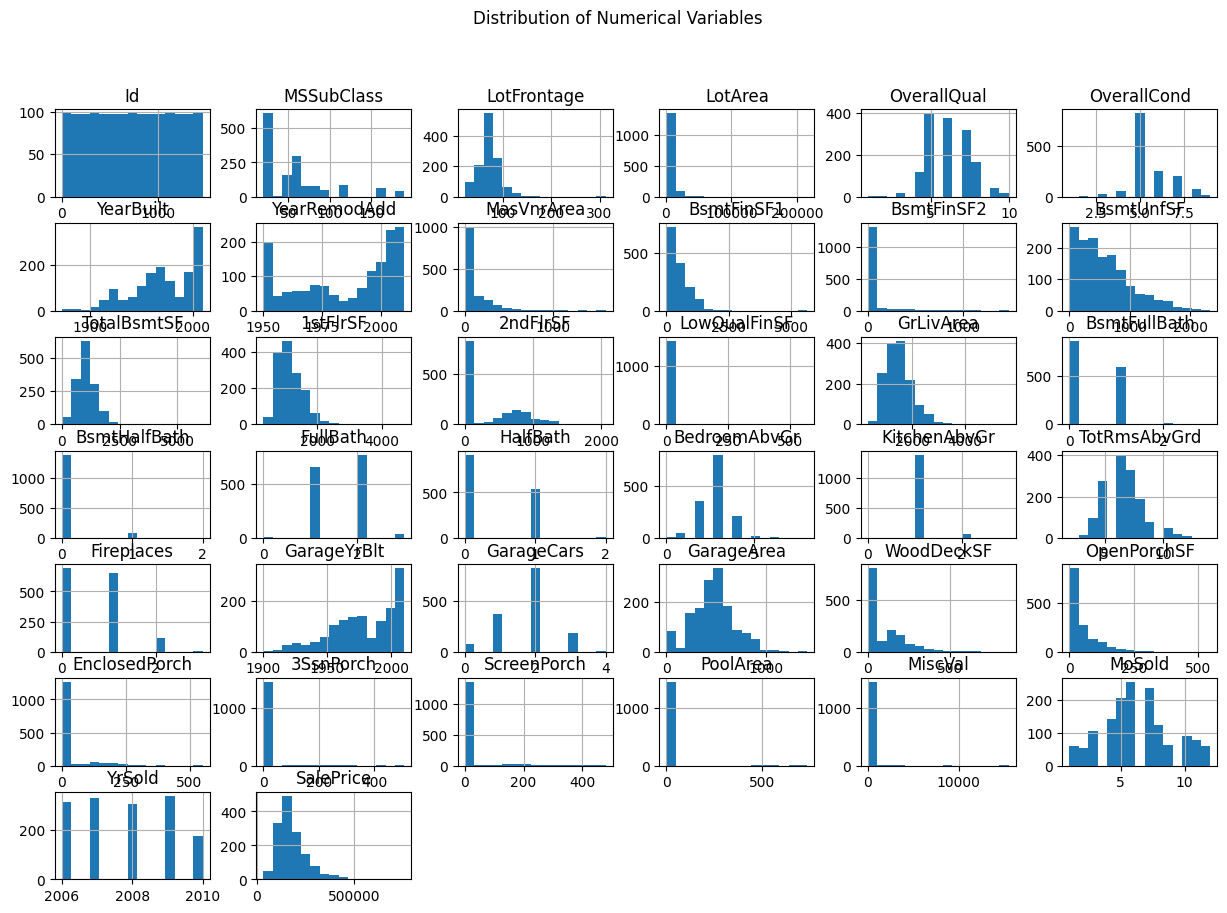

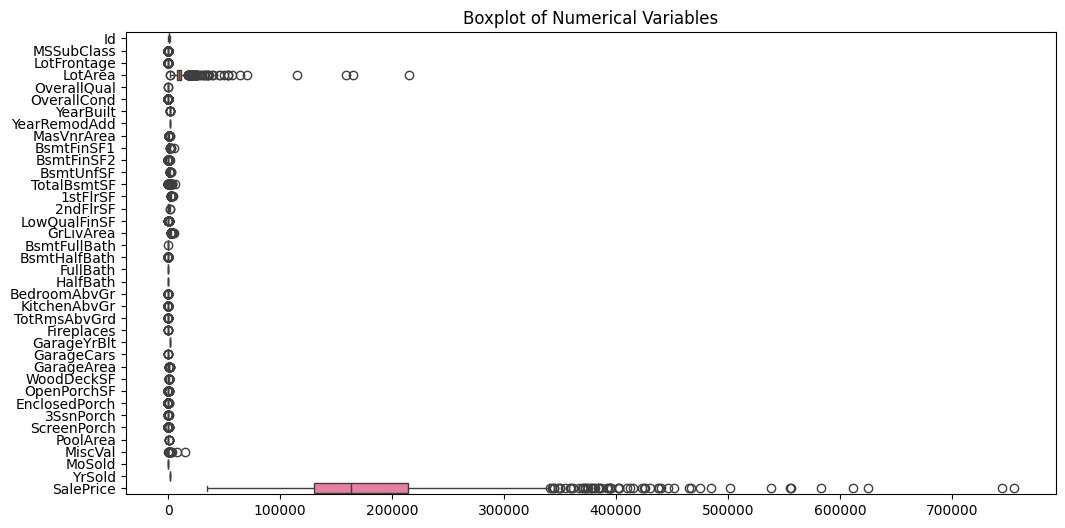

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical variables in the training data
train_data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Variables")
plt.show()

# Boxplot for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data.select_dtypes(include=['int64', 'float64']), orient="h")
plt.title("Boxplot of Numerical Variables")
plt.show()


Scatterplot for Numerical Features

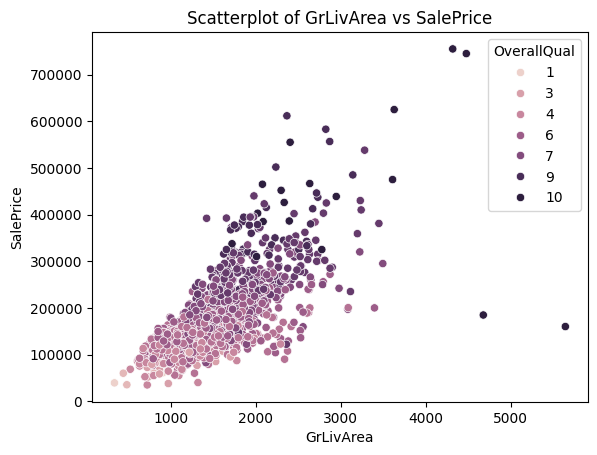

In [5]:
# Scatterplot Example (replace 'GrLivArea' and 'SalePrice' with actual columns if needed)
sns.scatterplot(data=train_data, x='GrLivArea', y='SalePrice', hue='OverallQual')
plt.title("Scatterplot of GrLivArea vs SalePrice")
plt.show()

Value Counts for Categorical Features

In [6]:
# Value Counts for Categorical Features
categorical_features = train_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"Value Counts for {feature}:")
    print(train_data[feature].value_counts())
    print("\n")


Value Counts for MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


Value Counts for Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


Value Counts for Alley:
Alley
Grvl    50
Pave    41
Name: count, dtype: int64


Value Counts for LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


Value Counts for LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


Value Counts for Utilities:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


Value Counts for LotConfig:
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


Value Counts for LandSlope:
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


Value Counts for Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
G

Train-Test Split

In [8]:
# Encoding Categorical Features using One-Hot Encoding
train_data_encoded = pd.get_dummies(train_data, drop_first=True)

print("\nTraining Data After Encoding:")
print(train_data_encoded.head())


Training Data After Encoding:
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   Sale

In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = train_data_encoded.drop('SalePrice', axis=1)  # Target variable is 'SalePrice'
y = train_data_encoded['SalePrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nTrain-Test Split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Train-Test Split:
X_train shape: (1022, 245)
X_test shape: (438, 245)


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Model Evaluation Metrics
print("\nModel Evaluation Metrics:")

# Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


ValueError: could not convert string to float: 'RL'

In [11]:
# Feature Importance from the Random Forest model
feature_importances = model.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df.head())



Feature Importance:
        Feature  Importance
4   OverallQual    0.546468
16    GrLivArea    0.114243
14     2ndFlrSF    0.035918
12  TotalBsmtSF    0.033214
9    BsmtFinSF1    0.032051


Preprocessing Test Data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load training dataset
train_data = pd.read_csv('housing_train.csv')

# Fill missing values in the training dataset
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0], inplace=True)
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0], inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace=True)

# Define the features (X) and target (y) in the training data
X_train = train_data.drop('SalePrice', axis=1)  # Exclude SalePrice from features
y_train = train_data['SalePrice']  # SalePrice is the target

# Normalize the numerical features in the training data
scaler = MinMaxScaler()
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Now, load and preprocess the test data
test_data = pd.read_csv('housing_test.csv')

# Fill missing values in test data (same strategy as for training data)
test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(), inplace=True)
test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0], inplace=True)
test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0], inplace=True)
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median(), inplace=True)

# Normalize the numerical features in the test data using the previously fitted scaler
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Encode categorical features in test data
test_data_encoded = pd.get_dummies(test_data, drop_first=True)

# Ensure the columns in test data match those in training data (reindex columns if necessary)
test_data_encoded = test_data_encoded.reindex(columns=X_train.columns, fill_value=0)

print("\nProcessed Test Data for Predictions:")
print(test_data_encoded.head())



Processed Test Data for Predictions:
         Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0  1.000685    0.000000         0     0.202055  0.048246       0      0   
1  1.001371    0.000000         0     0.205479  0.060609       0      0   
2  1.002056    0.235294         0     0.181507  0.058566       0      0   
3  1.002742    0.235294         0     0.195205  0.040562       0      0   
4  1.003427    0.588235         0     0.075342  0.017318       0      0   

   LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0         0            0          0  ...         0.25       0.0       0   
1         0            0          0  ...         0.00       0.0       0   
2         0            0          0  ...         0.00       0.0       0   
3         0            0          0  ...         0.00       0.0       0   
4         0            0          0  ...         0.30       0.0       0   

   Fence  MiscFeature   MiscVal    MoSold  YrSold  SaleType 

C:\Users\srava\AppData\Local\Temp\ipykernel_35304\4105038901.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
C:\Users\srava\AppData\Local\Temp\ipykernel_35304\4105038901.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load training dataset
train_data = pd.read_csv('housing_train.csv')

# Fill missing values in the training dataset
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0], inplace=True)
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0], inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace=True)

# Define the features (X) and target (y) in the training data
X_train = train_data.drop('SalePrice', axis=1)  # Exclude SalePrice from features
y_train = train_data['SalePrice']  # SalePrice is the target

# Normalize the numerical features in the training data
scaler = MinMaxScaler()
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Encode categorical features in training data
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Now, load and preprocess the test data
test_data = pd.read_csv('housing_test.csv')

# Fill missing values in the test data (same strategy as for training data)
test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(), inplace=True)
test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0], inplace=True)
test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0], inplace=True)
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median(), inplace=True)

# Normalize the numerical features in the test data using the previously fitted scaler
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Encode categorical features in test data
test_data_encoded = pd.get_dummies(test_data, drop_first=True)

# Ensure that the test data has the same columns as the training data
# Reindex the test data to match the columns of the training data
test_data_encoded = test_data_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Make predictions on the test data using the trained model
test_predictions = model.predict(test_data_encoded)

# Create a DataFrame to hold the predictions
predictions_df = pd.DataFrame({
    'Id': test_data['Id'],  # Ensure 'Id' is present in the test dataset
    'SalePrice': test_predictions
})

# Display the first few predictions
print("\nPredictions on Test Data:")
print(predictions_df.head())

# Optionally, save predictions to a CSV file
predictions_df.to_csv('house_price_predictions_final.csv', index=False)



Predictions on Test Data:
         Id  SalePrice
0  1.000685    72441.0
1  1.001371    73521.5
2  1.002056    72258.0
3  1.002742    72289.0
4  1.003427    72264.0


C:\Users\srava\AppData\Local\Temp\ipykernel_35304\4040713103.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
C:\Users\srava\AppData\Local\Temp\ipykernel_35304\4040713103.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [27]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor  # Assuming you're using RandomForest

# Step 1: Load the datasets
train_data = pd.read_csv('housing_train.csv')
test_data = pd.read_csv('housing_test.csv')

# Fill missing values in the training dataset
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0], inplace=True)
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0], inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace=True)

# Define features and target variable
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

# Normalize the numerical features in the training data
scaler = MinMaxScaler()
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Encode categorical features in training data
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Step 2: Preprocess test data
test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(), inplace=True)
test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0], inplace=True)
test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0], inplace=True)
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median(), inplace=True)

# Normalize numerical features in test data
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Encode categorical features in test data
test_data_encoded = pd.get_dummies(test_data, drop_first=True)

# Step 3: Align test data columns with the training data
test_data_encoded = test_data_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Step 4: Train the model (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

# Step 5: Make predictions on the test data
test_predictions = model.predict(test_data_encoded)

# Step 6: Handle predictions and evaluation

# Case 1: If actual target values (SalePrice) are available for the test data
# Assuming 'SalePrice' is available for validation, which is uncommon for test datasets
# Replace this with actual test target values if you have them
if 'SalePrice' in test_data.columns:
    y_test = test_data['SalePrice']  # Actual SalePrice values in test data
    
    # Calculate Absolute Error for each prediction
    absolute_errors = abs(test_predictions - y_test)

    # Create a DataFrame to hold the predictions and errors
    predictions_df = pd.DataFrame({
        'Id': test_data['Id'],
        'SalePrice': test_predictions,
        'AbsoluteError': absolute_errors
    })

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, test_predictions)
    print(f"\nMean Absolute Error (MAE): {mae}")

    # Calculate R² (R-squared)
    r2 = r2_score(y_test, test_predictions)
    print(f"R² (R-squared): {r2}")

# Case 2: If actual SalePrice is **NOT** available (as in a Kaggle competition scenario)
# Predictions are just saved to a file for submission
else:
    predictions_df = pd.DataFrame({
        'Id': test_data['Id'],  # Ensure 'Id' is present in the test dataset
        'SalePrice': test_predictions
    })

    # Optionally, save predictions to a CSV file for submission
    predictions_df.to_csv('house_price_predictions_final.csv', index=False)

    # Display the first few predictions
    print("\nPredictions on Test Data:")
    print(predictions_df.head())



C:\Users\srava\AppData\Local\Temp\ipykernel_35304\3038559974.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
C:\Users\srava\AppData\Local\Temp\ipykernel_35304\3038559974.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value


Predictions on Test Data:
         Id  SalePrice
0  1.000685  129780.58
1  1.001371  155066.50
2  1.002056  183757.08
3  1.002742  185540.12
4  1.003427  197140.56
